In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analysis of correlation between meat consumption and number of lung cancer deaths in Romania

### Reading the data and exploring the columns

In [101]:
df_meat = pd.read_csv(r"F:\Master TUW\Sem 1\Data Stewardship\Exercise 1\per-capita-meat-consumption-by-type-kilograms-per-year.csv")

In [102]:
df_meat

,Entity,Code,Year,"Mutton & Goat meat food supply quantity (kg/capita/yr) (FAO, 2020)","Meat, Other, Food supply quantity (kg/capita/yr) (FAO, 2020)","Poultry meat food supply quantity (kg/capita/yr) (FAO, 2020)","Pigmeat food supply quantity (kg/capita/yr) (FAO, 2020)","Bovine meat food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,8.18,0.85,0.63,NaN,4.80
1,Afghanistan,AFG,1962,7.92,0.88,0.66,NaN,5.01
2,Afghanistan,AFG,1963,8.09,1.07,0.66,NaN,5.06
3,Afghanistan,AFG,1964,8.35,1.01,0.67,NaN,5.03
4,Afghanistan,AFG,1965,8.64,1.06,0.70,NaN,4.99
...,...,...,...,...,...,...,...,...
11023,Zimbabwe,ZWE,2013,0.96,2.29,4.97,2.65,7.37
11024,Zimbabwe,ZWE,2014,1.74,2.58,4.49,1.84,7.26
11025,Zimbabwe,ZWE,2015,1.58,2.56,4.67,1.74,7.25
11026,Zimbabwe,ZWE,2016,1.69,2.62,4.70,1.77,7.23


In [103]:
df_meat.columns

Index(['Entity', 'Code', 'Year',
       'Mutton & Goat meat food supply quantity (kg/capita/yr) (FAO, 2020)',
       'Meat, Other, Food supply quantity (kg/capita/yr) (FAO, 2020)',
       'Poultry meat food supply quantity (kg/capita/yr) (FAO, 2020)',
       'Pigmeat food supply quantity (kg/capita/yr) (FAO, 2020)',
       'Bovine meat food supply quantity (kg/capita/yr) (FAO, 2020)'],
      dtype='object')

In [104]:
df_cancer = pd.read_csv(r"F:\Master TUW\Sem 1\Data Stewardship\Exercise 1\total-cancer-deaths-by-type.csv")

In [105]:
df_cancer

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Breast cancer - Sex: Both - Age: All Ages (Number),Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number),Deaths - Stomach cancer - Sex: Both - Age: All Ages (Number),Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number),...,Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),Deaths - Brain and nervous system cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),Deaths - Leukemia - Sex: Both - Age: All Ages (Number),Deaths - Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Multiple myeloma - Sex: Both - Age: All Ages (Number),Deaths - Other neoplasms - Sex: Both - Age: All Ages (Number),Non-Hodgkin lymphoma (deaths)
0,Afghanistan,AFG,1990,466.253436,80.073955,290.099710,566.064939,55.237646,2539.307228,215.632714,...,94.797076,436.803024,956.571414,158.643663,38.136505,755.346768,148.044214,73.421959,14.700016,172.0
1,Afghanistan,AFG,1991,464.137333,79.617930,293.578079,569.733770,55.733210,2578.463804,218.264694,...,96.200684,440.421855,957.902832,160.305013,38.851810,766.950668,151.982681,74.062465,14.942015,183.0
2,Afghanistan,AFG,1992,471.634765,81.300485,303.083772,596.596603,58.219683,2681.232717,223.783862,...,99.492049,473.142029,971.879501,164.741624,40.982141,826.257248,168.151360,75.965459,15.704282,197.0
3,Afghanistan,AFG,1993,480.629105,84.770448,314.296364,626.891389,61.200264,2804.991395,230.028721,...,103.130549,524.190466,986.257891,169.337997,43.499451,915.423760,188.783361,77.835488,16.748916,215.0
4,Afghanistan,AFG,1994,482.489934,87.711539,322.791026,642.000188,62.795340,2904.039548,234.441256,...,105.411865,562.052598,992.539360,172.063135,44.983330,973.560759,199.535545,78.774421,17.406808,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,1063.687103,47.818620,152.081773,700.153429,57.686120,700.841724,336.529484,...,129.406213,202.315173,658.392734,79.314990,96.920854,339.773571,67.162194,187.913767,34.789705,508.0
6464,Zimbabwe,ZWE,2014,1062.926086,48.560387,151.757046,712.613780,58.216181,696.156037,336.734951,...,130.811365,205.075195,663.373354,79.908212,98.478770,341.185794,65.580577,194.356428,35.994931,535.0
6465,Zimbabwe,ZWE,2015,1071.651255,49.609712,153.818141,724.296930,58.857306,697.470651,340.126710,...,133.869029,207.927921,676.515956,80.891159,100.795412,343.278872,64.602755,201.731858,37.421943,558.0
6466,Zimbabwe,ZWE,2016,1088.315071,51.064430,156.089810,745.171865,60.072986,703.435975,346.986495,...,137.444616,213.029764,691.880077,82.543170,103.749065,348.979492,64.118220,210.188046,39.175216,586.0


In [106]:
df_cancer.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Stomach cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Uterine cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Ovarian cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cervical cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Testicular cancer - Sex:

In [107]:
df_meat['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Asia, Central', 'Australia', 'Australia & New Zealand', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean', 'Central African Republic',
       'Central America', 'Chad', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Europe',
       'Europe, Western', 'European Uni

In [108]:
df_cancer['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe'

### Filter just the data that we are interested in (from Romania)

In [109]:
df_meat_ro=df_meat[df_meat['Entity']=="Romania"]

In [110]:
df_cancer_ro=df_cancer[df_cancer['Entity']=="Romania"]

### Check for missing values

In [111]:
df_meat_ro.isnull().values.any()

False

In [112]:
df_cancer_ro['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)'].isnull().values.any()

False

### Create column with total meat quantity per capita for the meat dataset

In [113]:
df_meat_ro['Total meat quantity (kg/capita/yr)']=df_meat_ro.iloc[:,3:].sum(axis=1)

C:\Users\Mihai\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df_meat_ro.head(5)

,Entity,Code,Year,"Mutton & Goat meat food supply quantity (kg/capita/yr) (FAO, 2020)","Meat, Other, Food supply quantity (kg/capita/yr) (FAO, 2020)","Poultry meat food supply quantity (kg/capita/yr) (FAO, 2020)","Pigmeat food supply quantity (kg/capita/yr) (FAO, 2020)","Bovine meat food supply quantity (kg/capita/yr) (FAO, 2020)",Total meat quantity (kg/capita/yr)
8116,Romania,ROU,1961,2.81,0.56,3.37,14.15,7.27,28.16
8117,Romania,ROU,1962,2.85,0.55,3.56,14.00,7.94,28.90
8118,Romania,ROU,1963,2.68,0.53,3.70,12.96,6.50,26.37
8119,Romania,ROU,1964,2.58,0.53,3.92,15.08,6.48,28.59
8120,Romania,ROU,1965,2.56,0.52,3.95,18.19,5.51,30.73


In [115]:
df_cancer_ro.head(5)

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Breast cancer - Sex: Both - Age: All Ages (Number),Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number),Deaths - Stomach cancer - Sex: Both - Age: All Ages (Number),Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number),...,Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),Deaths - Brain and nervous system cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),Deaths - Leukemia - Sex: Both - Age: All Ages (Number),Deaths - Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Multiple myeloma - Sex: Both - Age: All Ages (Number),Deaths - Other neoplasms - Sex: Both - Age: All Ages (Number),Non-Hodgkin lymphoma (deaths)
4676,Romania,ROU,1990,1091.741064,485.824505,860.682613,2450.050202,142.937263,4050.585294,981.457131,...,596.463360,954.678445,6825.056434,741.944037,271.700151,1111.271419,222.861436,231.091815,114.513484,539.0
4677,Romania,ROU,1991,1096.396247,497.186967,877.971127,2482.982886,145.014107,3964.644999,1002.934082,...,607.453023,958.441644,6913.031401,727.449484,269.810042,1098.041752,219.960761,234.076821,117.573931,537.0
4678,Romania,ROU,1992,1152.713863,518.988780,948.206441,2567.013113,152.925530,4102.796903,1053.870396,...,652.035921,990.129180,7410.609662,730.790870,278.715507,1124.598707,225.750775,240.644932,121.483752,551.0
4679,Romania,ROU,1993,1202.709623,534.623529,968.949579,2614.678210,157.342756,4098.009556,1078.924413,...,669.695565,999.415288,7599.861284,705.986453,283.610718,1128.560755,227.946211,244.213895,122.568968,559.0
4680,Romania,ROU,1994,1311.912483,551.263226,982.702448,2659.822384,162.386326,4083.308034,1100.496804,...,690.380187,1011.654839,7805.452199,651.100442,288.585306,1142.651570,227.563127,248.251199,125.093262,570.0


### Filter out the years for which we don't have data in both datasets

By looking at the data, we can see that we need just the data corresponding to the years 1990-2017 to be able to plot it and check the correlation.

In [116]:
list(set(df_meat_ro['Year'].unique()) & set(df_cancer_ro['Year'].unique()))

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [117]:
df_meat_ro=df_meat_ro[(df_meat_ro['Year']>=1990) & (df_meat_ro['Year']<=2017)]

In [118]:
df_cancer_ro=df_cancer_ro[(df_cancer_ro['Year']>=1990) & (df_cancer_ro['Year']<=2017)]

In [119]:
df_cancer_ro

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Breast cancer - Sex: Both - Age: All Ages (Number),Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number),Deaths - Stomach cancer - Sex: Both - Age: All Ages (Number),Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number),...,Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),Deaths - Brain and nervous system cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),Deaths - Leukemia - Sex: Both - Age: All Ages (Number),Deaths - Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Multiple myeloma - Sex: Both - Age: All Ages (Number),Deaths - Other neoplasms - Sex: Both - Age: All Ages (Number),Non-Hodgkin lymphoma (deaths)
4676,Romania,ROU,1990,1091.741064,485.824505,860.682613,2450.050202,142.937263,4050.585294,981.457131,...,596.463360,954.678445,6825.056434,741.944037,271.700151,1111.271419,222.861436,231.091815,114.513484,539.0
4677,Romania,ROU,1991,1096.396247,497.186967,877.971127,2482.982886,145.014107,3964.644999,1002.934082,...,607.453023,958.441644,6913.031401,727.449484,269.810042,1098.041752,219.960761,234.076821,117.573931,537.0
4678,Romania,ROU,1992,1152.713863,518.988780,948.206441,2567.013113,152.925530,4102.796903,1053.870396,...,652.035921,990.129180,7410.609662,730.790870,278.715507,1124.598707,225.750775,240.644932,121.483752,551.0
4679,Romania,ROU,1993,1202.709623,534.623529,968.949579,2614.678210,157.342756,4098.009556,1078.924413,...,669.695565,999.415288,7599.861284,705.986453,283.610718,1128.560755,227.946211,244.213895,122.568968,559.0
4680,Romania,ROU,1994,1311.912483,551.263226,982.702448,2659.822384,162.386326,4083.308034,1100.496804,...,690.380187,1011.654839,7805.452199,651.100442,288.585306,1142.651570,227.563127,248.251199,125.093262,570.0
4681,Romania,ROU,1995,1341.180203,570.413839,1002.467429,2771.190844,169.774321,4146.412608,1130.031459,...,722.905168,1048.513185,8152.745411,632.161942,298.404935,1162.912816,224.717088,256.177058,129.477242,583.0
4682,Romania,ROU,1996,1519.267264,588.170272,1011.949491,2899.280153,176.327508,4217.729948,1162.035352,...,759.202414,1086.933819,8396.308767,623.978968,310.433406,1197.655163,225.174392,264.067835,133.009967,599.0
4683,Romania,ROU,1997,1707.599422,599.706160,1002.349642,2908.517688,178.225991,4216.906106,1189.575666,...,775.573895,1129.404357,8552.089046,608.263436,314.402963,1205.720358,219.064379,269.404513,134.717534,609.0
4684,Romania,ROU,1998,1851.284962,592.197698,932.131338,2895.940333,170.645239,4033.376440,1173.835372,...,753.352123,1135.011922,8284.352447,578.895324,314.260183,1186.969250,204.472752,268.617386,134.694273,607.0
4685,Romania,ROU,1999,1960.455043,587.739067,871.040516,2880.412368,153.924976,3943.977147,1178.117645,...,725.438505,1152.125217,8086.484247,546.718864,319.806485,1180.571974,191.650839,274.003321,137.038588,617.0


### Combine the data into a new dataset and export it to csv

In [120]:
df_combined=df_meat_ro[['Entity', 'Year','Total meat quantity (kg/capita/yr)']]
df_combined['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)']=df_cancer_ro['Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)'].to_numpy()
df_combined.to_csv("dataset_meat_consumption_lung_cancer_romania.csv", sep='\t', encoding='utf-8')

C:\Users\Mihai\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Plot and save the visualisation

The first visualization shows both columns from the dataframe plotted on the same graph.

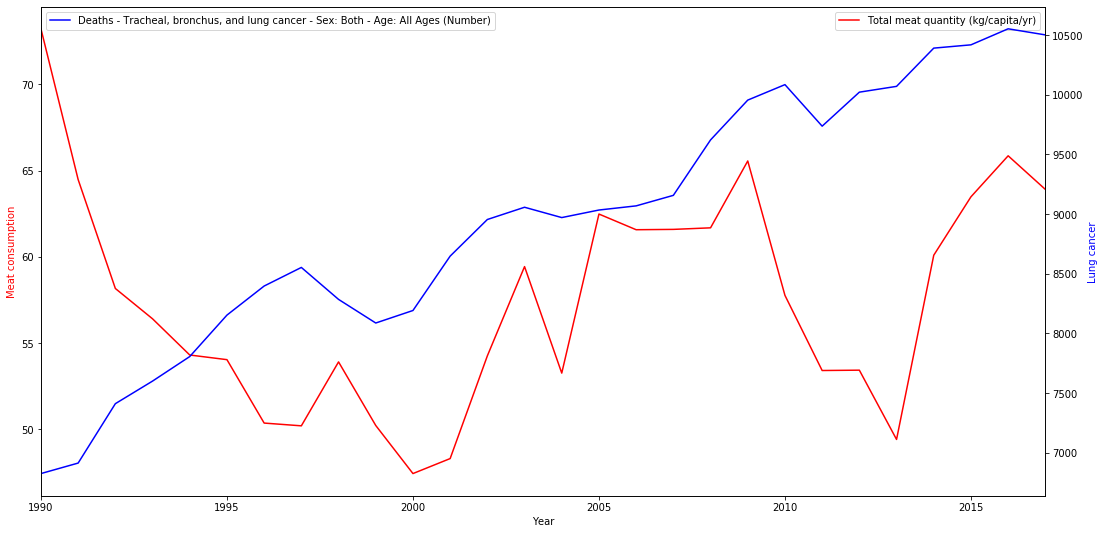

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 9, forward=True)
ax2 = ax.twinx()

ax.set_ylabel('Meat consumption', color="red")
ax2.set_ylabel('Lung cancer', color="blue")

df_combined.plot(x="Year", y=["Total meat quantity (kg/capita/yr)"], ax=ax, color="red")
df_combined.plot(x="Year", y=["Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)"], ax=ax2, color="blue")

plt.savefig('line_visualisation_experiment_meat_consumption_lung_cancer.png')
plt.show()

In the second visualisation we can better see that the meat consumption and number of lung cancers are not really correlated, by plotting them side by side as bar charts.

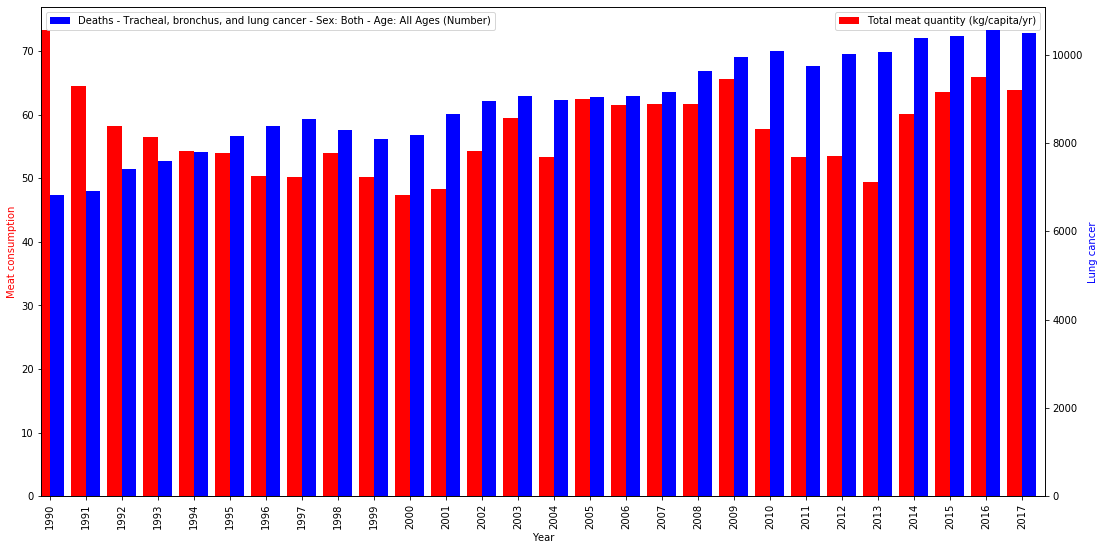

In [122]:
fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(18, 9, forward=True)
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

ax.set_ylabel('Meat consumption', color="red")
ax2.set_ylabel('Lung cancer', color="blue")


width = 0.4

df_combined.plot(kind="bar", x="Year", y=["Total meat quantity (kg/capita/yr)"], ax=ax, color="red", width=width, position=1)
df_combined.plot(kind="bar", x="Year", y=["Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)"], ax=ax2, width=width, color="blue", position=0, )

ax.legend(loc=1)
ax2.legend(loc=2)

plt.savefig('bar_visualisation_experiment_meant_consumption_lung_cancer.png')
plt.show()

### Checking the actual correlation

In [123]:
df_combined.corr()

,Year,Total meat quantity (kg/capita/yr),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)"
Year,1.000000,0.154656,0.977632
Total meat quantity (kg/capita/yr),0.154656,1.000000,0.092703
"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",0.977632,0.092703,1.000000
